In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
df = pd.read_csv('train.csv', encoding= 'utf-8')
df.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


# Verificacion de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [5]:
df.shape

(240000, 23)

In [6]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [7]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,"240,000.00","196,445.00","217,529.00","202,235.00","213,779.00","222,600.00","188,533.00","211,379.00","116,512.00","116,512.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00"
mean,"149,969.38",8.12,2.90,1.55,2.13,174.02,176.77,"2,423,467.82",20.70,-99.51,0.06,0.06,0.09,0.44,0.40,"2,530,838.35"
std,"86,634.58",9.55,0.90,0.85,0.91,98.15,94.43,"10,567,938.36",3.14,9.74,0.24,0.23,0.28,0.50,0.49,"2,152,551.80"
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,"310,000.00"
25%,"74,930.75",0.00,2.00,1.00,1.00,90.00,102.00,"24,890.00",19.36,-100.98,0.00,0.00,0.00,0.00,0.00,"952,772.50"
50%,"149,875.50",5.00,3.00,2.00,2.00,153.00,155.00,"56,383.00",19.54,-99.24,0.00,0.00,0.00,0.00,0.00,"1,850,000.00"
75%,"225,016.50",10.00,3.00,2.00,3.00,240.00,238.00,"87,838.00",20.74,-99.13,0.00,0.00,0.00,1.00,1.00,"3,390,000.00"
max,"299,999.00",80.00,10.00,3.00,4.00,439.00,439.00,"50,003,999.00",83.03,121.04,1.00,1.00,1.00,1.00,1.00,"12,525,000.00"


### Evaluo la posibilidad de reemplazar los valores nulos de garages por 0

In [8]:
df['garages'].value_counts(dropna=False)

2.00    94167
1.00    59464
 nan    37765
0.00    26926
3.00    21678
Name: garages, dtype: int64

La idea de que haya mas propiedades con uno y dos garages que propiedades sin garages resulta extrania.
Asique creo que es seguro reemplazar los NaNs por 0

### Evaluo la posibilidad de reemplazar los valores nulos de antiguedad por 0, o de eliminar las filas que tengan nulos

In [9]:
df['antiguedad'].value_counts(dropna=False)

 0.00    50335
  nan    43555
 5.00    33268
10.00    28844
20.00    19904
         ...  
68.00        2
79.00        2
64.00        1
71.00        1
77.00        1
Name: antiguedad, Length: 79, dtype: int64

In [10]:
# Veo si hay una relacion de los nulos de antiguedad y los nulos de las demas columnas
dfAntigNulas = df[df['antiguedad'].isnull()]
dfAntigNulas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43555 entries, 0 to 239983
Data columns (total 23 columns):
id                            43555 non-null int64
titulo                        42846 non-null object
descripcion                   43299 non-null object
tipodepropiedad               43519 non-null object
direccion                     16454 non-null object
ciudad                        43351 non-null object
provincia                     43451 non-null object
antiguedad                    0 non-null float64
habitaciones                  34160 non-null float64
garages                       31949 non-null float64
banos                         33528 non-null float64
metroscubiertos               37543 non-null float64
metrostotales                 34200 non-null float64
idzona                        32038 non-null float64
lat                           19856 non-null float64
lng                           19856 non-null float64
fecha                         43555 non-null object
gi

Llego a la conclucion que no vale la pena cambiar ni eliminar las filas que contengan 
antiguedad nula, ya que pierdo una gran cantidad de datos, ni tiene sentido reemplazar
los nulos por 0, porque como ya existe el caso de antiguedad = 0, no necesariamente si 
es nulo entonces es 0 y a diferencia de Garages hay mas variedad de posibles valores. 
Me parece mas seguro que al momento de evaluar algo que tenga que ver con la antiguedad
solo tenga en cuenta los valores no nulos

In [11]:
df['ciudad'].unique().size

876

In [12]:
df['provincia'].unique().size

33

In [13]:
df['habitaciones'] = df['habitaciones'].fillna(0)
df['garages'] = df['garages'].fillna(0)
df['banos'] = df['banos'].fillna(0)
df['idzona'] = df['idzona'].fillna(0)

In [14]:
df = df.astype({'tipodepropiedad': 'category',\
                'id': 'uint32',\
                'gimnasio': 'bool_',\
                'usosmultiples': 'bool_',\
                'piscina': 'bool_',\
                'escuelascercanas': 'bool_',\
                'centroscomercialescercanos': 'bool_',\
                'garages': 'uint8',\
                'banos': 'uint8',\
                'habitaciones': 'uint8',\
                'precio': 'uint32',\
                'ciudad': 'category',\
                'provincia': 'category',\
                'idzona': 'uint32'})

In [15]:
(df.memory_usage() / (1024 * 1024 )).sum()

22.020774841308594

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null uint32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float64
habitaciones                  240000 non-null uint8
garages                       240000 non-null uint8
banos                         240000 non-null uint8
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        240000 non-null uint32
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [17]:
def contadorNulls(s):
    return s.isnull().sum()

In [18]:
df.groupby('tipodepropiedad').agg({'metroscubiertos': lambda x: x.isnull().sum(), 'metrostotales': lambda x: x.isnull().sum()})

,metroscubiertos,metrostotales
tipodepropiedad,,
Apartamento,823.00,"27,993.00"
Bodega comercial,293.00,269.00
Casa,"6,532.00","16,656.00"
Casa en condominio,593.00,"2,149.00"
Casa uso de suelo,99.00,109.00
Departamento Compartido,2.00,40.00
Duplex,5.00,25.00
Edificio,676.00,147.00
Garage,0.00,1.00


Se ve que se tiende a utilizar mas los metros cubiertos que los totales, sobre todo en apartamentos y casas, y se usan mas los totales en propiedades no techadas como ranchos, terrenos.

## Cual es la frecuencia de los metros totales y los cubiertos?

Text(0, 0.5, 'Frecuencia')

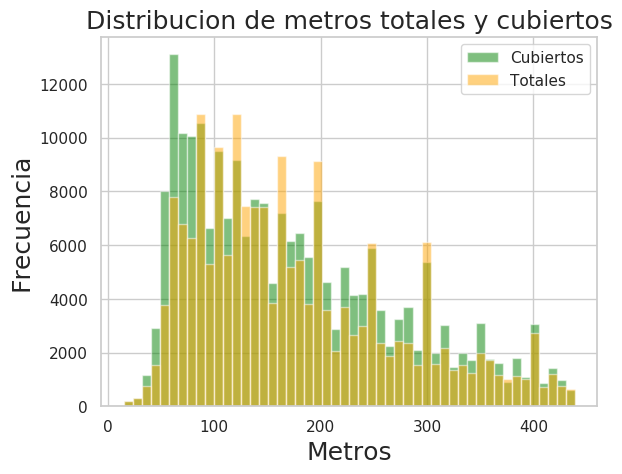

In [19]:
a = df[["metroscubiertos","metrostotales"]].plot.hist(bins=50, alpha=0.5, color= ['green','orange'])
a.legend(["Cubiertos", "Totales"]);
a.set_title("Distribucion de metros totales y cubiertos", fontsize=18)
a.set_xlabel("Metros",fontsize=18)
a.set_ylabel("Frecuencia", fontsize=18)

In [20]:
fig = a.get_figure()
fig.savefig('Graficos/MetrosGeneral.png', bbox_inches="tight")

## Cual es el promedio de cantidad de banos y garagen por cantidad de habitaciones?

In [21]:
prueba = df.groupby('habitaciones').agg({'garages':'mean', 'banos':'mean'})
prueba

,garages,banos
habitaciones,,
0,0.22,0.42
1,0.83,1.11
2,1.17,1.44
3,1.56,2.27
4,1.46,2.57
5,1.26,2.26
6,1.10,2.16
7,1.02,1.99
8,0.89,1.83


Text(0.5, 1.0, 'Promedio de la cantidad de banos y garages\n por cantidad de habitaciones')

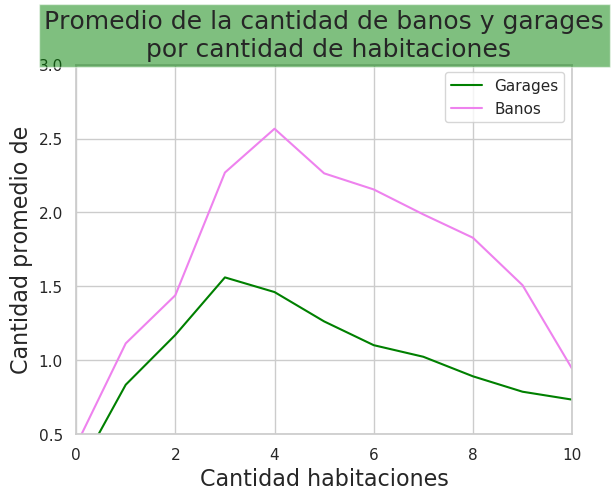

In [22]:
b = prueba[['garages','banos']].plot(ylim=(0.5, 3.0), color= ['green','violet'])
b.legend(["Garages", "Banos"]);
b.set_ylabel('Cantidad promedio de',fontsize=16);
b.set_xlabel('Cantidad habitaciones',fontsize=16);
b.set_title("Promedio de la cantidad de banos y garages\n por cantidad de habitaciones", fontsize=18, bbox=dict(facecolor='green', alpha=0.5))

In [23]:
fig = b.get_figure()
fig.savefig('Graficos/GaragesBanosGeneral.png', bbox_inches="tight")

## Cual es la cantidad de habitaciones promedio por tipo de propiedad?

In [24]:
prueba = df.groupby('tipodepropiedad').agg({'habitaciones':'mean'})
prueba.sort_values('habitaciones', inplace=True)

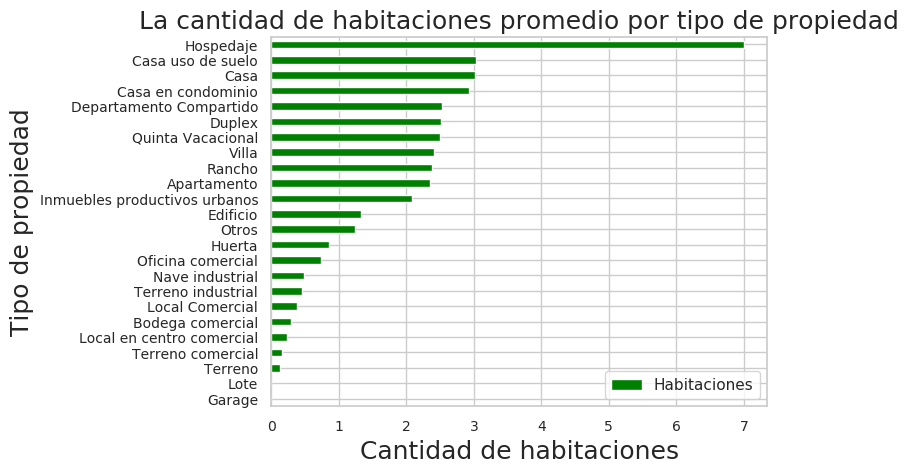

In [25]:
c = prueba.plot(kind='barh', fontsize=10, color= 'green') 
c.legend(['Habitaciones'])
c.set_title('La cantidad de habitaciones promedio por tipo de propiedad', fontsize=18);
c.set_xlabel('Cantidad de habitaciones', fontsize=18);
c.set_ylabel('Tipo de propiedad', fontsize=18);

In [26]:
fig = c.get_figure()
fig.savefig('Graficos/HabTipopropiedadGeneral.png', bbox_inches="tight")

## PROPIEDADES CON TODO

### Las propiedades con "todo" seran aquellas que tengan todo lo que se pueda tener (todas las columnas del tipo bool seran true)

In [27]:
#Creo un data frame que tenga todas las "cosas" que se puedan tener 
PropiedadesConTodo = df[(df['gimnasio']==True) & (df['usosmultiples']==True) &\
                      (df['piscina']==True) & (df['escuelascercanas']==True) &\
                      (df['centroscomercialescercanos']==True)]

PropiedadesConTodo.shape

(3535, 23)

## Cual es la frecuencia de la cantidad de habitaciones en propiedades con todo

In [28]:
PropiedadesConTodo['habitaciones'].value_counts()

3    2056
2    1016
4     239
1     179
0      24
5      18
6       2
7       1
Name: habitaciones, dtype: int64

In [29]:
Orden = list(range(7))

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades con todo')

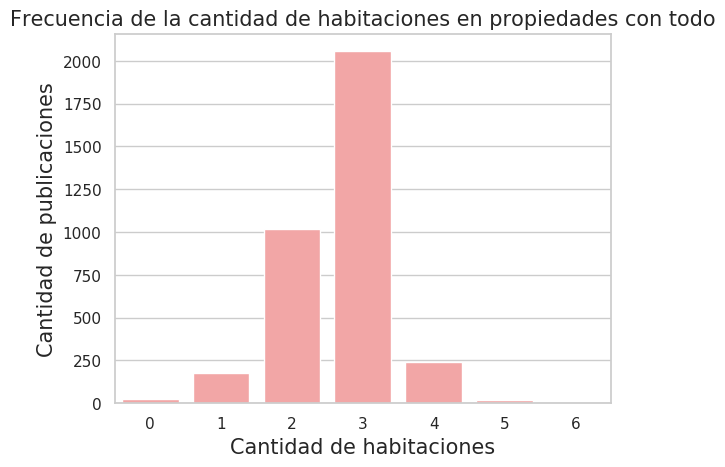

In [30]:
d = sns.countplot(x='habitaciones', data=PropiedadesConTodo, order=Orden, color= '#ff9999')
d.set_xlabel("Cantidad de habitaciones", fontsize=15)
d.set_ylabel("Cantidad de publicaciones", fontsize=15)
d.set_title("Frecuencia de la cantidad de habitaciones en propiedades con todo", fontsize=15)

In [31]:
fig = d.get_figure()
fig.savefig('Graficos/HabitacionesTodo.png', bbox_inches="tight")

## Cual es el promedio de banos y garages en propiedades con todo?

In [32]:
grupo_PropiedadesConTodo = PropiedadesConTodo.groupby('habitaciones').agg({'garages':'mean', 'banos':'mean'})
grupo_PropiedadesConTodo

,garages,banos
habitaciones,,
0,0.67,1.00
1,1.24,1.13
2,1.83,2.00
3,2.04,2.70
4,1.76,2.79
5,1.67,2.00
6,0.00,0.00
7,0.00,4.00


In [33]:
#Ya que solo hay una propiedad que tiene 7 habitaciones, la elimino
#para una mejor interpretacion de los datos en los graficos
grupo_PropiedadesConTodo = grupo_PropiedadesConTodo.loc[:6]

Text(0.5, 1.0, 'Promedio de la cantidad de banos y garages\n por cantidad de habitaciones en propiedades con todo')

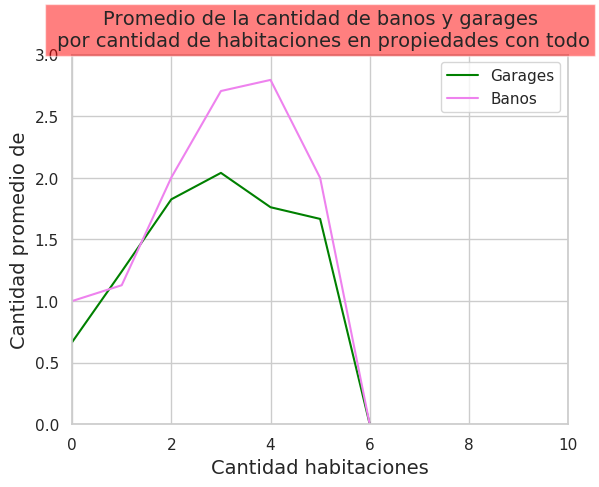

In [34]:
e = grupo_PropiedadesConTodo[['garages','banos']].plot(ylim=(0.0, 3.0), xlim=(0.0, 10.0), color= ['green','violet'])
e.legend(['Garages','Banos'])
e.set_ylabel('Cantidad promedio de',fontsize=14)
e.set_xlabel('Cantidad habitaciones',fontsize=14);
e.set_title("Promedio de la cantidad de banos y garages\n por cantidad de habitaciones en propiedades con todo", fontsize=14, bbox=dict(facecolor='red', alpha=0.5))

In [35]:
fig = e.get_figure()
fig.savefig('Graficos/GaragesBanosTodo.png', bbox_inches="tight")

## Cual es la frecuencia de metros cubiertos y todales en propiedades con todo?

Text(0, 0.5, 'Frecuencia')

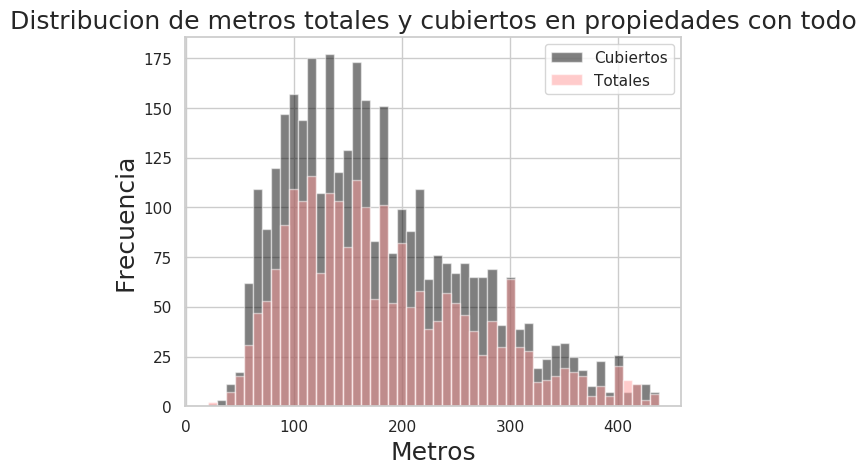

In [36]:
f = PropiedadesConTodo[["metroscubiertos","metrostotales"]].plot.hist(bins=50, alpha=0.5, color= ['black','#ff9999'])
f.legend(['Cubiertos','Totales'])
f.set_title("Distribucion de metros totales y cubiertos en propiedades con todo", fontsize=18)
f.set_xlabel("Metros",fontsize=18)
f.set_ylabel("Frecuencia", fontsize=18)

In [37]:
fig = f.get_figure()
fig.savefig('Graficos/MetrosTodo.png', bbox_inches="tight")

## Cuales son los tipos de propiedades que tienen todo con mas publicaciones?

In [38]:
PropiedadesConTodo['tipodepropiedad'].value_counts()

Apartamento                      2622
Casa                              569
Casa en condominio                333
Departamento Compartido            10
Oficina comercial                   1
Huerta                              0
Bodega comercial                    0
Casa uso de suelo                   0
Duplex                              0
Edificio                            0
Garage                              0
Hospedaje                           0
Villa                               0
Terreno industrial                  0
Local Comercial                     0
Local en centro comercial           0
Lote                                0
Nave industrial                     0
Otros                               0
Quinta Vacacional                   0
Rancho                              0
Terreno                             0
Terreno comercial                   0
Inmuebles productivos urbanos       0
Name: tipodepropiedad, dtype: int64

In [39]:
#Me manejo con un indice para indicar desde que lugar va a ser el resto
index_resto = 3

In [40]:
Top = PropiedadesConTodo['tipodepropiedad'].value_counts()
Otros = PropiedadesConTodo['tipodepropiedad'].value_counts().iloc[(index_resto):].sum()

In [41]:
nombre_index = Top.index[index_resto]

In [42]:
Top[nombre_index] = Otros
lista = Top.index.tolist()
lista[index_resto] = 'Resto'
Top.index = lista

In [43]:
#Valores actuales: 4 (index_resto + 1)
red_palette = ['#ff4d4d', '#ff6666', '#ff9999', 'gray']
explo = (0,0.05,0.1,0.15)

Text(0, 0.5, '')

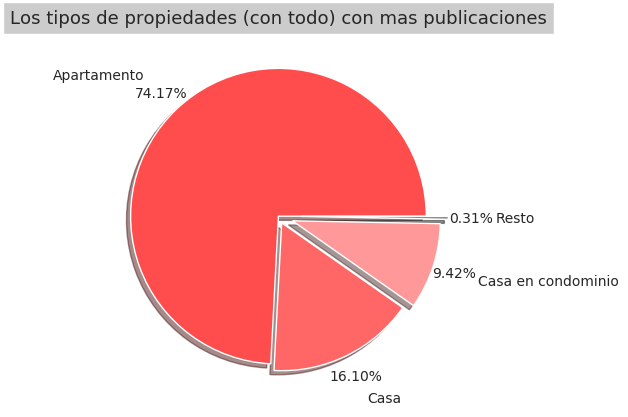

In [44]:
g = Top.nlargest(index_resto+1).plot.pie(fontsize=10, autopct='%0.2f%%', pctdistance=1.15, labeldistance=1.32,\
                         shadow=True, startangle=0, colors= red_palette, explode= explo)
plt.title("Los tipos de propiedades (con todo) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
g.set_ylabel('')

In [45]:
fig = g.get_figure()
fig.savefig('Graficos/TiposTodo.png', bbox_inches="tight")

En conclusion la mayoria de propiedades "con todo" son apartamentos

## Como se disribuye la cantidad de publicaciones de propiedades con todo segun la antiguedad?

In [46]:
Orden = PropiedadesConTodo['antiguedad'].value_counts()

In [47]:
promedio = PropiedadesConTodo['antiguedad'].mean()

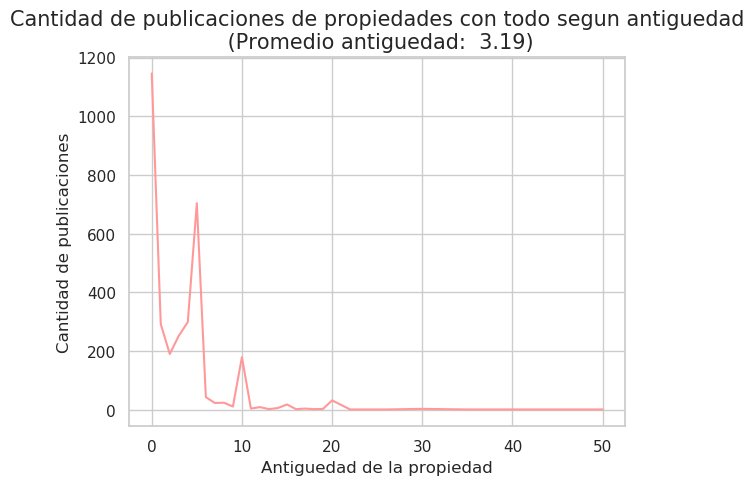

In [48]:
h = sns.lineplot(y=Orden, x=Orden.index, color= '#ff9999');
#h.legend('Promedio antiguedad: {}'.format(promedio))
h.set_title('Cantidad de publicaciones de propiedades con todo segun antiguedad\n (Promedio antiguedad:{:6,.2f})'.format(promedio), fontsize=15);
h.set_xlabel('Antiguedad de la propiedad');
h.set_ylabel('Cantidad de publicaciones');

In [49]:
fig = h.get_figure()
fig.savefig('Graficos/AntiguedadTodo.png', bbox_inches="tight")

## Cuales son las 15 provincias con mas publicaciones de propiedades con todo?

In [50]:
sTop15 = PropiedadesConTodo['provincia'].value_counts().nlargest(15)

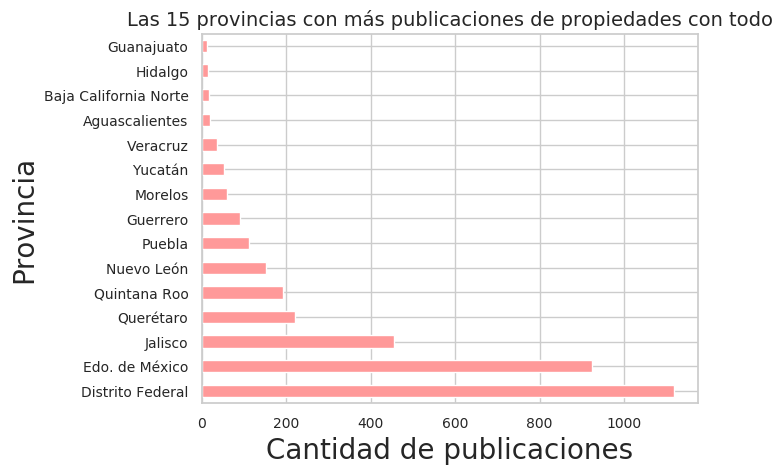

In [51]:
k = sTop15.plot(kind='barh', fontsize=10, color= '#ff9999')#color= plt.cm.Paired(np.arange(len(sTop15))))
k.set_title('Las 15 provincias con más publicaciones de propiedades con todo', fontsize=14);
k.set_xlabel('Cantidad de publicaciones', fontsize=20);
k.set_ylabel('Provincia', fontsize=20);

In [52]:
fig = k.get_figure()
fig.savefig('Graficos/ProviniaTodo.png', bbox_inches="tight")

## Cuales son las 15 ciudades con mas publicaciones de propiedades con todo?

In [53]:
sTop10 = PropiedadesConTodo['ciudad'].value_counts().nlargest(15)
sTop10

Huixquilucan              712
Alvaro Obregón            313
Zapopan                   266
Miguel Hidalgo            263
Cuajimalpa de Morelos     212
Cancún                    176
Querétaro                 164
Benito Juárez             136
Tlajomulco de Zúñiga       99
San Andrés Cholula         96
Cuauhtémoc                 95
Acapulco de Juárez         83
San Pedro Garza García     80
Guadalajara                72
Monterrey                  61
Name: ciudad, dtype: int64

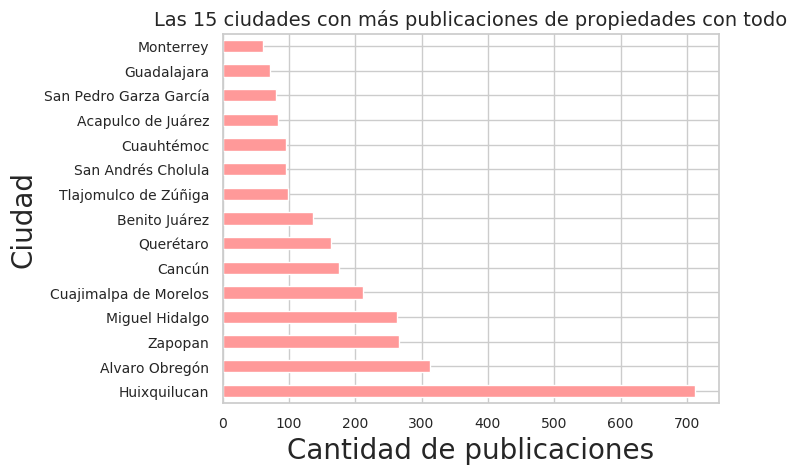

In [54]:
j = sTop10.plot(kind='barh', fontsize=10, color= '#ff9999')
j.set_title('Las 15 ciudades con más publicaciones de propiedades con todo', fontsize=14);
j.set_xlabel('Cantidad de publicaciones', fontsize=20);
j.set_ylabel('Ciudad', fontsize=20);

In [55]:
fig = j.get_figure()
fig.savefig('Graficos/CiudadTodo.png', bbox_inches="tight")

Se ve un pico importante en el top 1 y luego un notable escalonado entre el top 8 y top 2, del top 9 hasta el 15 los valores son muy parecidos

## Analisis especifico de las ciudades con mas propiedades que tienen todo:

Gracias a la informacion que conseguimos previamente podemos expecular como seran las propiedades que perteneces a las ciudades con mayor cantidad de propiedades con todo.
Sabemos que las propiedades con todo tienden a ser apartamentos y suelen tener una antiguedad de 0 a 5, y algunas otras llegan hasta 10 (en menor medida). Entonces podemos pensar que las ciudades, en general, tendran mayor cantidad de apartamentos que casas

In [56]:
lista = sTop10.nlargest(10).index.tolist()
lista

['Huixquilucan',
 'Alvaro Obregón',
 'Zapopan',
 'Miguel Hidalgo',
 'Cuajimalpa de Morelos',
 'Cancún',
 'Querétaro',
 'Benito Juárez',
 'Tlajomulco de Zúñiga',
 'San Andrés Cholula']

In [57]:
grupo = df.groupby('ciudad')
actual = grupo['tipodepropiedad'].value_counts()
final = actual.unstack()[['Apartamento', 'Casa']].T[lista].T
final

tipodepropiedad,Apartamento,Casa
ciudad,,
Huixquilucan,"3,490.00","1,675.00"
Alvaro Obregón,"3,486.00","1,866.00"
Zapopan,"1,197.00","7,000.00"
Miguel Hidalgo,"4,767.00",534.00
Cuajimalpa de Morelos,"1,828.00",520.00
Cancún,"1,059.00","1,869.00"
Querétaro,877.00,"8,527.00"
Benito Juárez,"8,714.00","1,250.00"
Tlajomulco de Zúñiga,37.00,"2,399.00"


In [58]:
#Creo dos listas, una para los valores que esperaba, y otra para los diferentes
iguales = final.index[(final['Apartamento']>final['Casa'])].tolist()
diferentes = final.index[(final['Apartamento']<final['Casa'])].tolist()

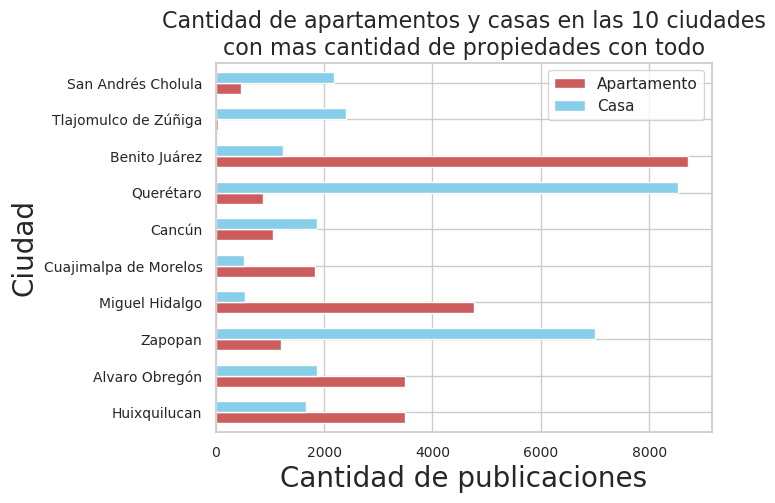

In [59]:
ac = final.plot(kind='barh', fontsize=10, color=["IndianRed","SkyBlue"],width=0.6)
ac.legend(['Apartamento', 'Casa'])
ac.set_title('Cantidad de apartamentos y casas en las 10 ciudades\ncon mas cantidad de propiedades con todo', fontsize=16);
ac.set_xlabel('Cantidad de publicaciones', fontsize=20);
ac.set_ylabel('Ciudad', fontsize=20);

In [60]:
fig = ac.get_figure()
fig.savefig('Graficos/ApartamentosCasasTodo.png', bbox_inches="tight")

Vemos como hay ciertas ciudades que no cumplen con nuestra expeculacion sobre mayoria de apartamentos sobre casas. Pero entonces pienso que tienen compensar de algun otro lado, y ese lado puede ser la antiguedad. Como ya dijimos antes, las propiedades con todo tienen a tener una antiguedad de 0 (nuevas) a 5 (y algunas, en menor medida, de 10). Entonces expeculo que las ciudades que no cumplieron con la comparacion anterior, tenderan a ser menos antiguas

In [61]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
difDf = actual.to_frame().T[diferentes].T.sort_values('antiguedad', ascending= False)
difDf

,antiguedad
ciudad,
Zapopan,5.87
Cancún,4.90
Querétaro,3.77
Tlajomulco de Zúñiga,3.01
San Andrés Cholula,1.39


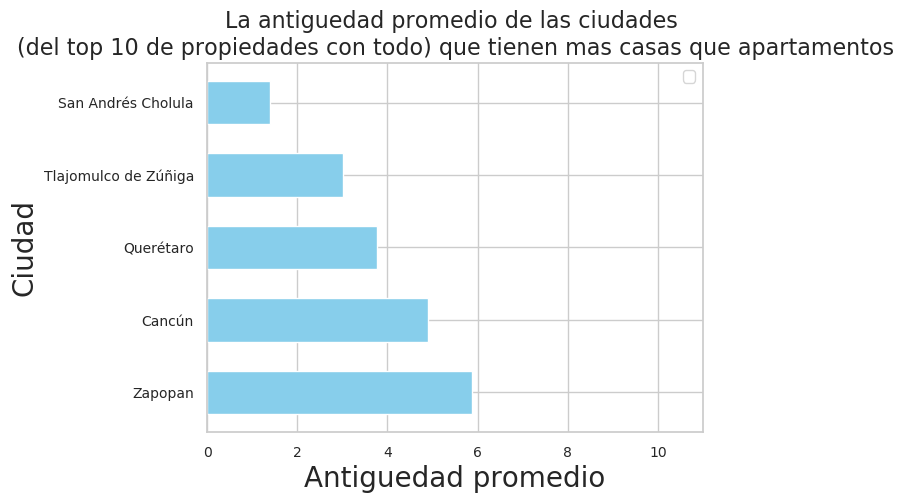

In [62]:
aa = difDf.plot(kind='barh', fontsize=10, color="SkyBlue",width=0.6, xlim=(0.0, 11.0))
aa.legend('')
aa.set_title('La antiguedad promedio de las ciudades \n(del top 10 de propiedades con todo) que tienen mas casas que apartamentos', fontsize=16);
aa.set_xlabel('Antiguedad promedio', fontsize=20);
aa.set_ylabel('Ciudad', fontsize=20);

In [63]:
fig = aa.get_figure()
fig.savefig('Graficos/MasCasasTodo.png', bbox_inches="tight")

Se puede ver como la antiguedad promedio de esas ciudades es entre 1. y 6. Tambien se puede ver que el onden en el que aumenta el promedio de atiguedad es exactamente el mismo orden que tienen en el top de cantidad de propiedaades con todo

In [64]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
iguDf = actual.to_frame().T[iguales].T.sort_values('antiguedad', ascending= False)
iguDf

,antiguedad
ciudad,
Benito Juárez,10.57
Miguel Hidalgo,10.44
Alvaro Obregón,10.39
Huixquilucan,8.25
Cuajimalpa de Morelos,7.44


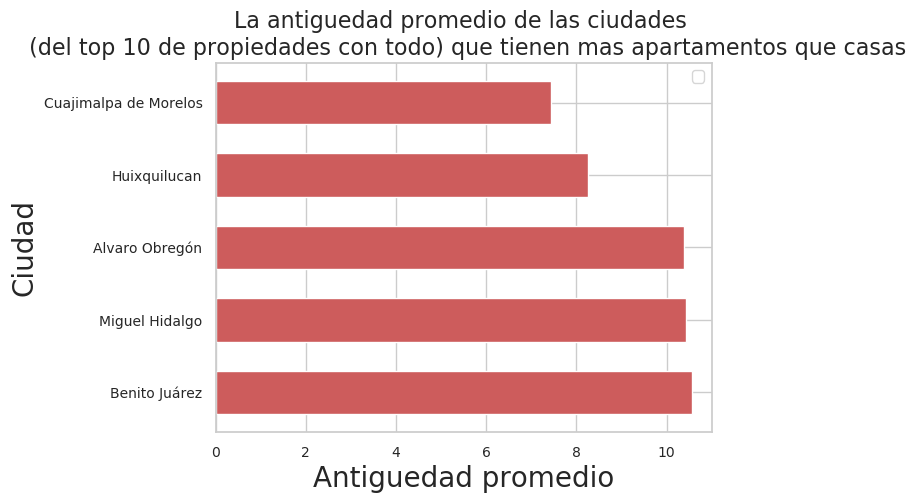

In [65]:
bb = iguDf.plot(kind='barh', fontsize=10, color="IndianRed",width=0.6, xlim=(0.0, 11.0))
bb.legend('')
bb.set_title('La antiguedad promedio de las ciudades \n (del top 10 de propiedades con todo) que tienen mas apartamentos que casas', fontsize=16);
bb.set_xlabel('Antiguedad promedio', fontsize=20);
bb.set_ylabel('Ciudad', fontsize=20);

In [66]:
fig = bb.get_figure()
fig.savefig('Graficos/MasApartamentosTodo.png', bbox_inches="tight")

Por el contrario, los valores de antiguedad que toman las ciudades que si cumplian con la hipotesis de tener mayor cantidad de departamentos, tienden a ser entre 7.5 y 10.5. Que tiene sentido ya que compensa la antiguedad restante que eran valores cercanos a 10

## **PROPIEDADES SIN NADA**

In [67]:
PropiedadesSinNada = df[(df['gimnasio']==False) & (df['usosmultiples']==False) &\
                      (df['piscina']==False) & (df['escuelascercanas']==False) &\
                      (df['centroscomercialescercanos']==False)]

PropiedadesSinNada.shape

(120652, 23)

## Cual es la frecuencia de la cantidad de habitaciones en propiedades sin nada?

In [68]:
PropiedadesSinNada['habitaciones'].value_counts()

3     58496
2     28081
0     15940
4     11746
1      2675
5      2192
6       840
7       269
8       196
10      127
9        90
Name: habitaciones, dtype: int64

In [69]:
Orden = list(range(7))

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades sin nada')

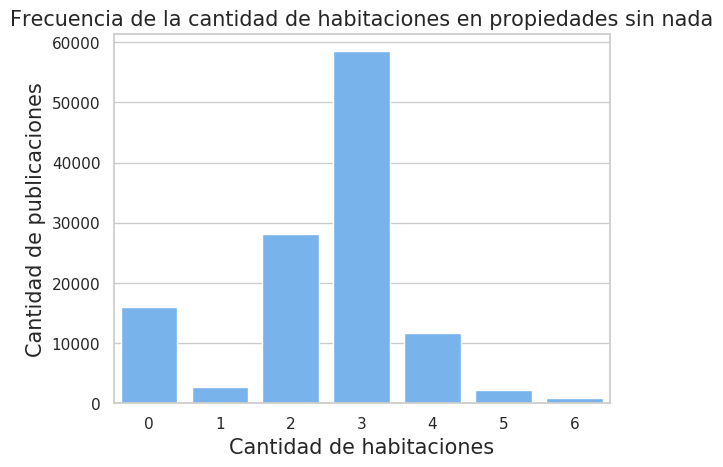

In [70]:
l = sns.countplot(x='habitaciones', data=PropiedadesSinNada, order=Orden, color= '#66b3ff')
l.set_xlabel("Cantidad de habitaciones", fontsize=15)
l.set_ylabel("Cantidad de publicaciones", fontsize=15)
l.set_title("Frecuencia de la cantidad de habitaciones en propiedades sin nada", fontsize=15)

In [71]:
fig = l.get_figure()
fig.savefig('Graficos/HabitacionesNada.png', bbox_inches="tight")

## Cual es el promedio de la cantidad de banos y garages por cantidad de habitaciones en propiedades sin nada?

In [72]:
#Al crear el data frame omito las propiedades que tienen 6 y 7 habitaciones ya que solo 3 propiedades tienen esa cantidad
grupo_PropiedadesSinNada = PropiedadesSinNada.groupby('habitaciones').agg({'garages':'mean', 'banos':'mean'})#.loc[:10]
grupo_PropiedadesSinNada

,garages,banos
habitaciones,,
0,0.23,0.44
1,0.73,1.14
2,1.09,1.44
3,1.47,2.27
4,1.38,2.52
5,1.21,2.26
6,1.05,2.12
7,0.91,2.05
8,0.77,1.70


Text(0.5, 1.0, 'Promedio de la cantidad de banos y garages\n por cantidad de habitaciones en propiedades sin nada')

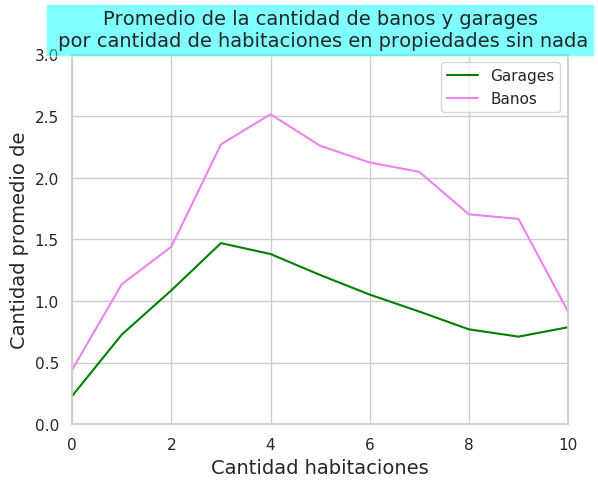

In [73]:
m = grupo_PropiedadesSinNada[['garages','banos']].plot(ylim=(0.0, 3.0), xlim=(0.0, 10.0), color= ['green','violet'])
m.legend(['Garages','Banos'])
m.set_ylabel('Cantidad promedio de',fontsize=14);
m.set_xlabel('Cantidad habitaciones',fontsize=14);
m.set_title("Promedio de la cantidad de banos y garages\n por cantidad de habitaciones en propiedades sin nada", fontsize=14, bbox=dict(facecolor='cyan', alpha=0.5))

In [74]:
fig = m.get_figure()
fig.savefig('Graficos/GaragesBanosNada.png', bbox_inches="tight")

## Cual es la distribucion de metros totales y cubiertos en propiedades sin nada?

Text(0, 0.5, 'Frecuencia')

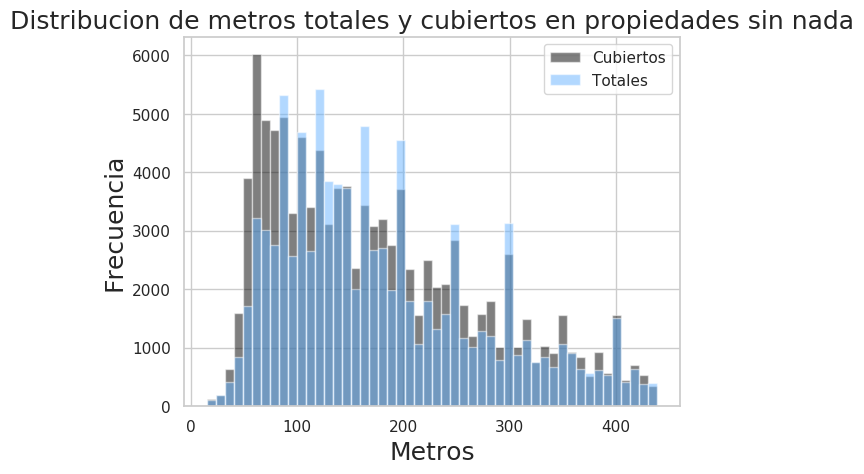

In [75]:
n = PropiedadesSinNada[["metroscubiertos","metrostotales"]].plot.hist(bins=50, alpha=0.5, color= ['black','#66b3ff'])
n.legend(['Cubiertos','Totales'])
n.set_title("Distribucion de metros totales y cubiertos en propiedades sin nada", fontsize=18)
n.set_xlabel("Metros",fontsize=18)
n.set_ylabel("Frecuencia", fontsize=18)

In [76]:
fig = n.get_figure()
fig.savefig('Graficos/MetrosNada.png', bbox_inches="tight")

## Cuales son los tipos de propiedades con mas publicaciones en propiedades sin nada?

In [77]:
PropiedadesSinNada['tipodepropiedad'].value_counts()

Casa                             71525
Apartamento                      26303
Casa en condominio                8330
Terreno                           6069
Local Comercial                   2204
Oficina comercial                 1212
Bodega comercial                  1136
Terreno comercial                 1103
Edificio                           907
Casa uso de suelo                  451
Duplex                             339
Quinta Vacacional                  249
Villa                              170
Rancho                             141
Otros                              134
Inmuebles productivos urbanos       96
Nave industrial                     76
Local en centro comercial           73
Departamento Compartido             34
Terreno industrial                  31
Huerta                              17
Lote                                 5
Hospedaje                            1
Garage                               1
Name: tipodepropiedad, dtype: int64

In [78]:
#Me manejo con un indice para indicar desde que lugar va a ser el resto
index_resto = 5

In [79]:
Top = PropiedadesSinNada['tipodepropiedad'].value_counts()
Otros = PropiedadesSinNada['tipodepropiedad'].value_counts().iloc[(index_resto):].sum()

In [80]:
nombre_index = Top.index[index_resto]

In [81]:
Top[nombre_index] = Otros
lista = Top.index.tolist()
lista[index_resto] = 'Resto'
Top.index = lista

In [82]:
blue_palette = ['#009ACD', '#0EBFE9','cyan', 'gray', '#ADD8E6', '#C1F0F6']
explo = (0,0.05,0.1,0.15,0.20,0.25)

Text(0, 0.5, '')

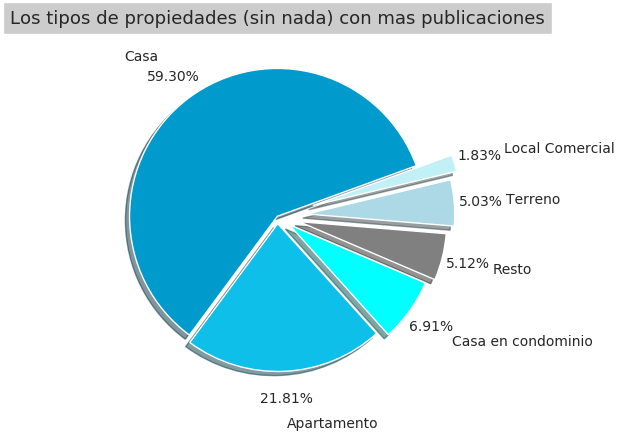

In [83]:
o = Top.nlargest(index_resto+1).plot.pie(fontsize=10, autopct='%1.2f%%', pctdistance=1.18, labeldistance=1.35,\
                         shadow=True, startangle=20, colors= blue_palette, explode= explo)
plt.title("Los tipos de propiedades (sin nada) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
o.set_ylabel('')

In [84]:
fig = o.get_figure()
fig.savefig('Graficos/TipoNada.png', bbox_inches="tight")

## Cual es la cantidad de publicaciones que son propiedades sin nada segun antiguedad?

In [85]:
Orden = PropiedadesSinNada['antiguedad'].value_counts().sort_index().loc[:50]

In [86]:
promedio = PropiedadesSinNada['antiguedad'].mean()

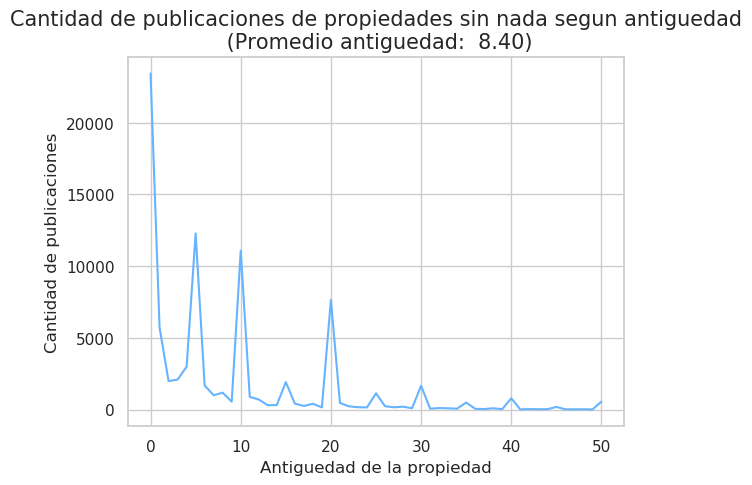

In [87]:
q = sns.lineplot(y=Orden, x=Orden.index, color= '#66b3ff');
q.set_title('Cantidad de publicaciones de propiedades sin nada segun antiguedad\n (Promedio antiguedad:{:6,.2f})'.format(promedio), fontsize=15);
q.set_xlabel('Antiguedad de la propiedad');
q.set_ylabel('Cantidad de publicaciones');

In [88]:
fig = q.get_figure()
fig.savefig('Graficos/AntiguedadNada.png', bbox_inches="tight")

## Cuales son las 15 provincias con más publicaciones de propiedades sin nada?

In [89]:
sTop15 = PropiedadesSinNada['provincia'].value_counts().nlargest(15)

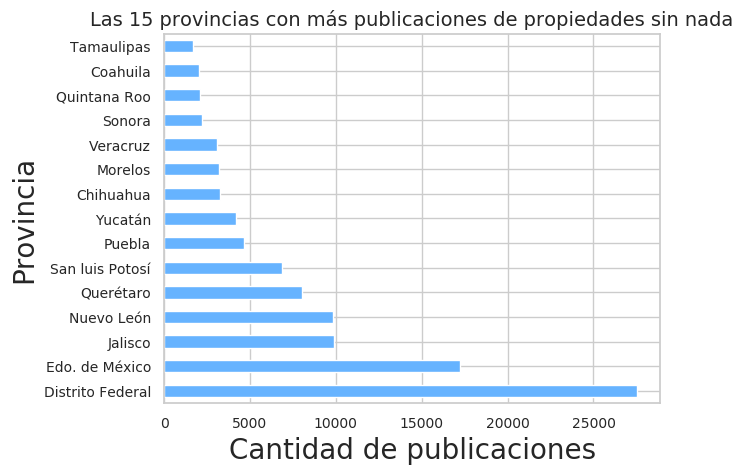

In [90]:
s = sTop15.plot(kind='barh', fontsize=10, color= '#66b3ff')#color= plt.cm.Paired(np.arange(len(sTop15))))
s.set_title('Las 15 provincias con más publicaciones de propiedades sin nada', fontsize=14);
s.set_xlabel('Cantidad de publicaciones', fontsize=20);
s.set_ylabel('Provincia', fontsize=20);

In [91]:
fig = s.get_figure()
fig.savefig('Graficos/ProviciaNada.png', bbox_inches="tight")

## Cuales son las 15 ciudades con más publicaciones de propiedades sin nada?

In [92]:
PropiedadesSinNada['ciudad'].value_counts().nlargest(15)

San Luis Potosí         6502
Querétaro               6221
Benito Juárez           5120
Zapopan                 4740
Monterrey               4562
Mérida                  3730
Cuauhtémoc              3373
Alvaro Obregón          2980
Miguel Hidalgo          2747
Chihuahua               2600
Tlalpan                 2536
Huixquilucan            2461
Naucalpan de Juárez     2450
Coyoacán                2361
Atizapán de Zaragoza    2342
Name: ciudad, dtype: int64

In [93]:
sTop15 = PropiedadesSinNada['ciudad'].value_counts().nlargest(15)

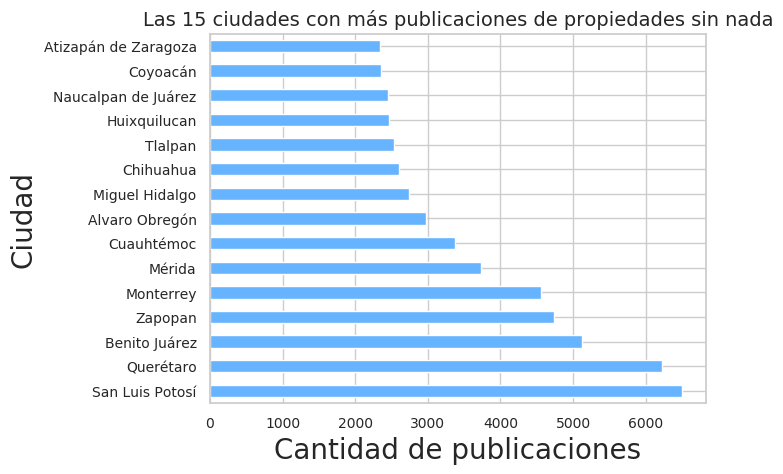

In [94]:
r = sTop15.plot(kind='barh', fontsize=10, color= '#66b3ff')
r.set_title('Las 15 ciudades con más publicaciones de propiedades sin nada', fontsize=14);
r.set_xlabel('Cantidad de publicaciones', fontsize=20);
r.set_ylabel('Ciudad', fontsize=20);

De la misma fomra que analisamos a las propiedades con todo, vemos que los valores aqui estan mas repartidos y se puede apreciar la diferencia de la cantidad de publicaciones en las primeras 10 ciudades, luego los valores empiezan a ser muy parecidos

In [95]:
fig = r.get_figure()
fig.savefig('Graficos/CiudadNada.png', bbox_inches="tight")

## Analisis especifico de las ciudades con mas propiedades que no tienen nada:

Gracias a la informacion que conseguimos previamente podemos expecular como seran las propiedades que perteneces a las ciudades con mayor cantidad de propiedades con todo.
Sabemos que las propiedades con todo tienden a ser apartamentos y suelen tener una antiguedad de 0 a 5, y algunas otras llegan hasta 10 (en menor medida). Entonces podemos pensar que las ciudades, en general, tendran mayor cantidad de apartamentos que casas

In [96]:
lista = sTop15.nlargest(10).index.tolist()
lista

['San Luis Potosí',
 'Querétaro',
 'Benito Juárez',
 'Zapopan',
 'Monterrey',
 'Mérida',
 'Cuauhtémoc',
 'Alvaro Obregón',
 'Miguel Hidalgo',
 'Chihuahua']

In [97]:
grupo = df.groupby('ciudad')
actual = grupo['tipodepropiedad'].value_counts()
final = actual.unstack()[['Apartamento', 'Casa']].T[lista].T
final

tipodepropiedad,Apartamento,Casa
ciudad,,
San Luis Potosí,"1,663.00","5,192.00"
Querétaro,877.00,"8,527.00"
Benito Juárez,"8,714.00","1,250.00"
Zapopan,"1,197.00","7,000.00"
Monterrey,958.00,"5,066.00"
Mérida,479.00,"5,960.00"
Cuauhtémoc,"4,981.00",735.00
Alvaro Obregón,"3,486.00","1,866.00"
Miguel Hidalgo,"4,767.00",534.00


In [98]:
#Creo dos listas, una para los valores que esperaba, y otra para los diferentes
iguales = final.index[(final['Apartamento']<final['Casa'])].tolist()
diferentes = final.index[(final['Apartamento']>final['Casa'])].tolist()

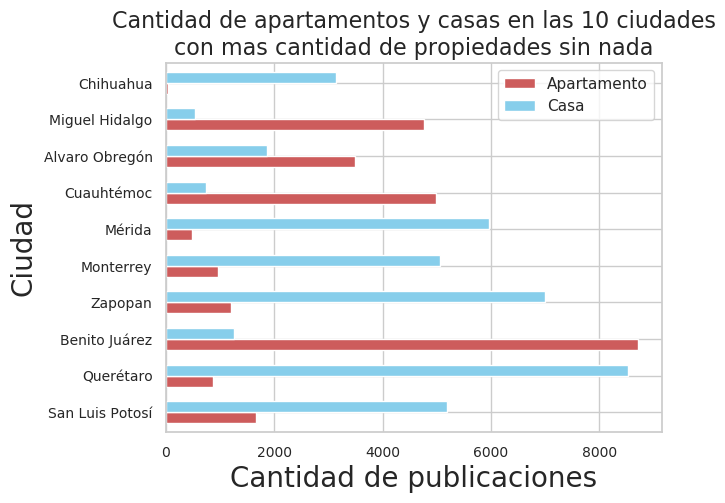

In [99]:
az = final.plot(kind='barh', fontsize=10, color=["IndianRed","SkyBlue"],width=0.6)
az.legend(['Apartamento', 'Casa'])
az.set_title('Cantidad de apartamentos y casas en las 10 ciudades\ncon mas cantidad de propiedades sin nada', fontsize=16);
az.set_xlabel('Cantidad de publicaciones', fontsize=20);
az.set_ylabel('Ciudad', fontsize=20);

In [100]:
fig = az.get_figure()
fig.savefig('Graficos/ApartamentosCasasNada.png', bbox_inches="tight")

In [101]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
difDf = actual.to_frame().T[diferentes].T.sort_values('antiguedad', ascending= False)
difDf

,antiguedad
ciudad,
Cuauhtémoc,13.90
Benito Juárez,10.57
Miguel Hidalgo,10.44
Alvaro Obregón,10.39


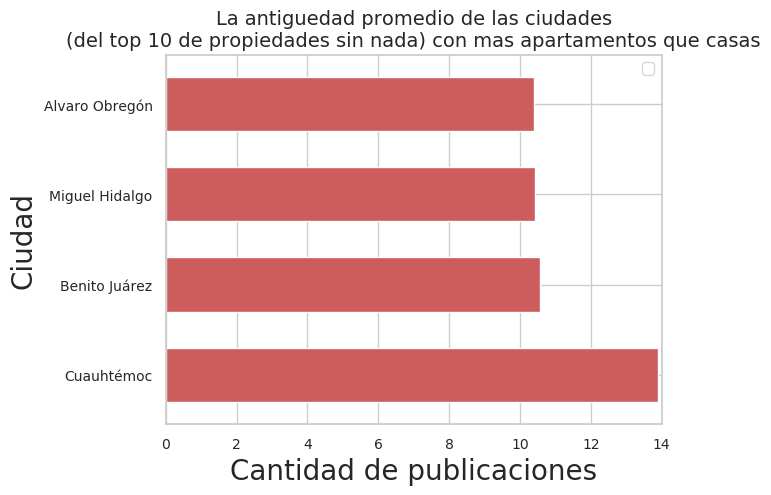

In [102]:
ae = difDf.plot(kind='barh', fontsize=10, color="IndianRed",width=0.6, xlim=(0.0, 14.0))
ae.legend('')
ae.set_title('La antiguedad promedio de las ciudades\n(del top 10 de propiedades sin nada) con mas apartamentos que casas', fontsize=14);
ae.set_xlabel('Cantidad de publicaciones', fontsize=20);
ae.set_ylabel('Ciudad', fontsize=20);

Se puede ver como la antiguedad promedio de esas ciudades es muy similar, donde todas son mayores a 10, 3 estan muy concentradas en valores cercanos a 10.5 y otra que llega hasta casi los 14 anios de antiguedad.

In [103]:
fig = ae.get_figure()
fig.savefig('Graficos/AntuedadCasasNada.png', bbox_inches="tight")

In [104]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
iguDf = actual.to_frame().T[iguales].T.sort_values('antiguedad', ascending= False)
iguDf

,antiguedad
ciudad,
Monterrey,7.27
Chihuahua,6.16
Zapopan,5.87
San Luis Potosí,3.96
Querétaro,3.77
Mérida,3.06


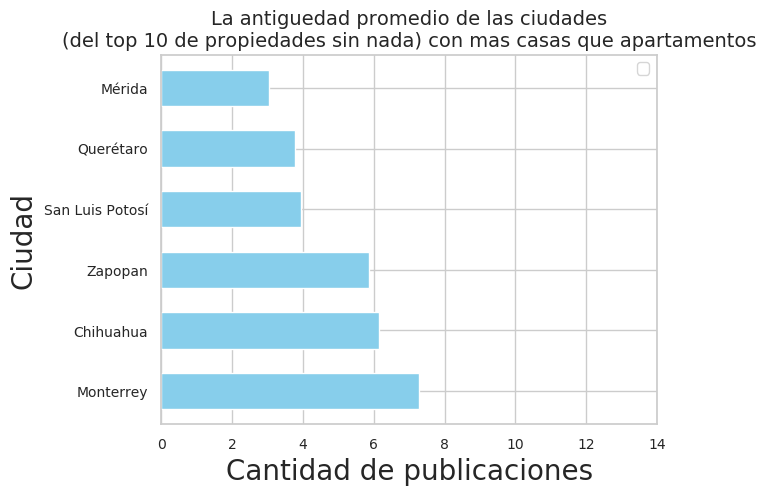

In [105]:
bb = iguDf.plot(kind='barh', fontsize=10, color="SkyBlue",width=0.6, xlim=(0.0, 14.0))
bb.legend('')
bb.set_title('La antiguedad promedio de las ciudades\n(del top 10 de propiedades sin nada) con mas casas que apartamentos', fontsize=14);
bb.set_xlabel('Cantidad de publicaciones', fontsize=20);
bb.set_ylabel('Ciudad', fontsize=20);

In [106]:
fig = bb.get_figure()
fig.savefig('Graficos/AntiguedadApartamentosNada.png', bbox_inches="tight")

Se puede ver la diferencia entre las otras ciudades que tienen un mayor promedio de antiguedad, mientras estas ciudades toman valores entre 3 y 7

## Cual es el promedio de antiguedad de las propiedades con todo y nada?

In [107]:
nadaM = PropiedadesSinNada['antiguedad'].mean()
todoM = PropiedadesConTodo['antiguedad'].mean()

In [108]:
ComparacionM = pd.Series([todoM,nadaM], index= ['Con Todo', 'Sin Nada'])

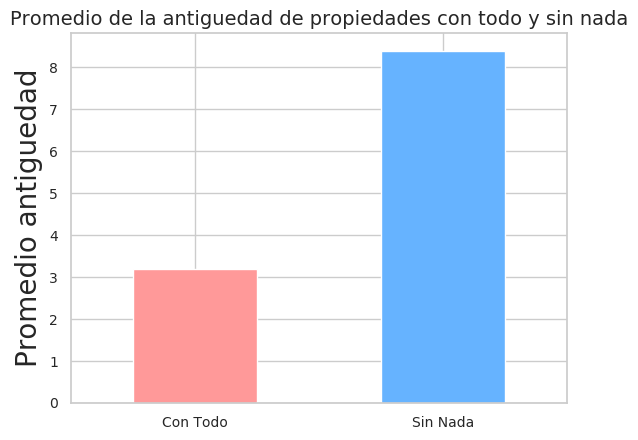

In [109]:
z = ComparacionM.plot(kind='bar', fontsize=10, color= ['#ff9999','#66b3ff'], rot=0)#color= plt.cm.Paired(np.arange(len(sTop15))))
z.set_title('Promedio de la antiguedad de propiedades con todo y sin nada', fontsize=14);
z.set_xlabel('', fontsize=20);
z.set_ylabel('Promedio antiguedad', fontsize=20);

In [110]:
fig = z.get_figure()
fig.savefig('Graficos/AntiguedadPromTodoYNada.png', bbox_inches="tight")

## Cual es el promedio de antiguedad de Casas y Apartamentos en general?

Quiero confirmar si el motivo por el cual las propiedades con todo y sin nada tienen ese promedio de antiguedad por tener mayoria de apartamentos y casas respectivamente

In [111]:
casaM = df[df['tipodepropiedad']=='Casa']['antiguedad'].mean()
apartM = df[df['tipodepropiedad']=='Apartamento']['antiguedad'].mean()

In [112]:
ComparacionMM = pd.Series([apartM,casaM], index= ['Apartamentos', 'Casas'])

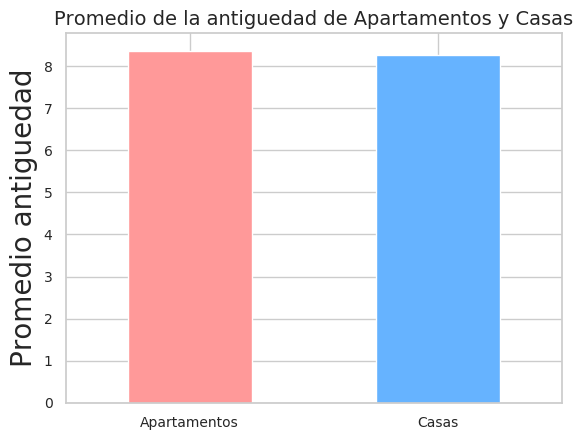

In [113]:
za = ComparacionMM.plot(kind='bar', fontsize=10, color= ['#ff9999','#66b3ff'], rot=0)#color= plt.cm.Paired(np.arange(len(sTop15))))
za.set_title('Promedio de la antiguedad de Apartamentos y Casas', fontsize=14);
za.set_xlabel('', fontsize=20);
za.set_ylabel('Promedio antiguedad', fontsize=20);

In [114]:
fig = za.get_figure()
fig.savefig('Graficos/AntiguedadPromTodoYNada.png', bbox_inches="tight")

Vemos que no

## Cual es la cantidad de publicasiones de porpiedades con todo y sin nada?

In [115]:
CantConTodo = PropiedadesConTodo.shape[0]
CantSinNada = PropiedadesSinNada.shape[0]
#CantTotal = df.shape[0]

In [116]:
Comparacion = pd.Series([CantConTodo,CantSinNada], index= ['Con Todo', 'Sin Nada'])

In [117]:
Comparacion

Con Todo      3535
Sin Nada    120652
dtype: int64

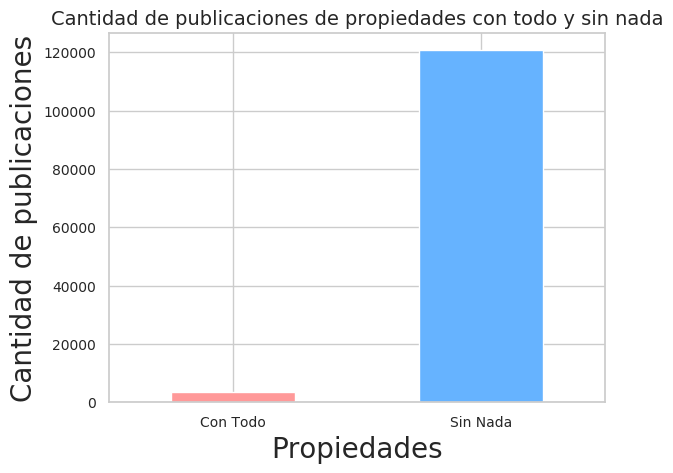

In [118]:
t = Comparacion.plot(kind='bar', fontsize=10, color= ['#ff9999','#66b3ff'], rot=0)#color= plt.cm.Paired(np.arange(len(sTop15))))
t.set_title('Cantidad de publicaciones de propiedades con todo y sin nada', fontsize=14);
t.set_xlabel('Propiedades', fontsize=20);
t.set_ylabel('Cantidad de publicaciones', fontsize=20);

In [119]:
fig = t.get_figure()
fig.savefig('Graficos/CantidadTodoYNada.png', bbox_inches="tight")

## Cual es el precio promedio de las propiedades con todo y sin nada

In [120]:
PromPrecioConTodo = PropiedadesConTodo['precio'].mean()
PromPrecioSinNada = PropiedadesSinNada['precio'].mean()
Comparacion = pd.Series([PromPrecioConTodo,PromPrecioSinNada], index= ['Con Todo', 'Sin Nada'])

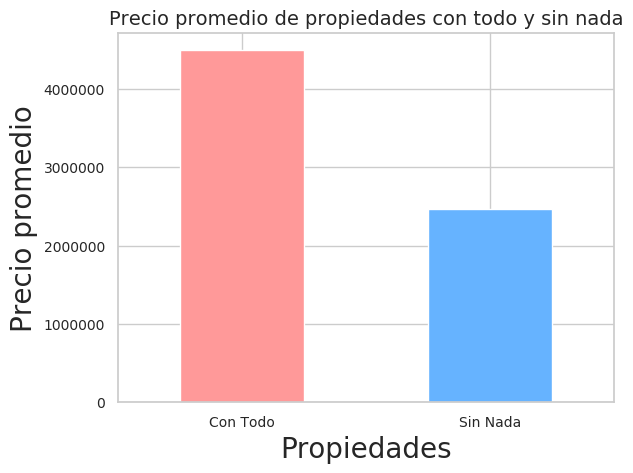

In [121]:
u = Comparacion.plot(kind='bar', fontsize=10, color= ['#ff9999','#66b3ff'], rot=0)#color= plt.cm.Paired(np.arange(len(sTop15))))
u.set_title('Precio promedio de propiedades con todo y sin nada', fontsize=14);
u.set_xlabel('Propiedades', fontsize=20);
u.set_ylabel('Precio promedio', fontsize=20);

In [122]:
fig = u.get_figure()
fig.savefig('Graficos/PrecioTodoYNada.png', bbox_inches="tight")

# **PRUEBAS (NO ES PARTE DEL RESULTADO FINAL)**

In [123]:
def generadorFormatoPie(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0, 0.5, '')

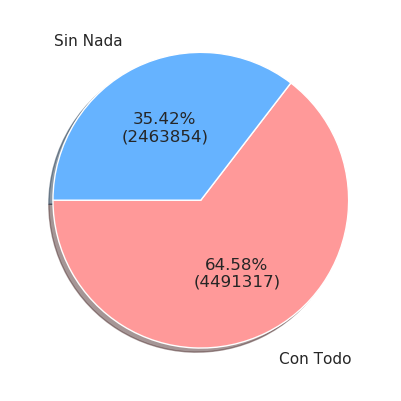

In [124]:
p = Comparacion.plot.pie(autopct=generadorFormatoPie(Comparacion), pctdistance=0.55, labeldistance=1.2,\
                         shadow=True, startangle=180, colors= ['#ff9999','#66b3ff'])
p.set_ylabel('')

In [125]:
blue_palette = ['#009ACD', '#0EBFE9','cyan', '#63D1F4', '#ADD8E6', '#C1F0F6']

In [126]:
sTop6 = PropiedadesSinNada['tipodepropiedad'].value_counts().nlargest(6)

In [127]:
Orden = list(range(7))

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades con todo')

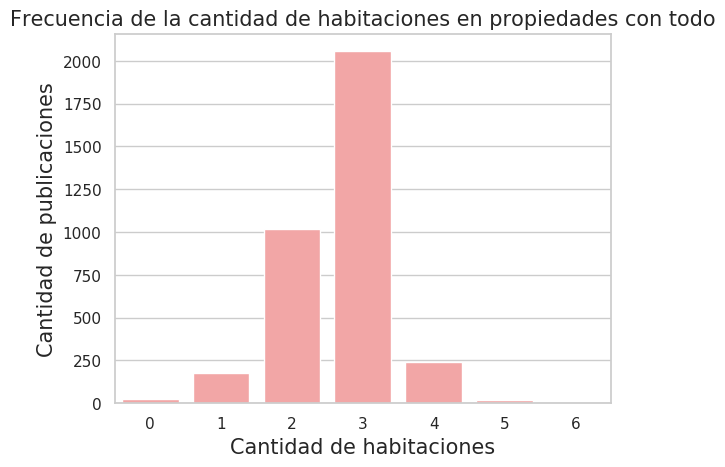

In [128]:
g = sns.countplot(x='habitaciones', data=PropiedadesConTodo, order=Orden, color= '#ff9999')
g.set_xlabel("Cantidad de habitaciones", fontsize=15)
g.set_ylabel("Cantidad de publicaciones", fontsize=15)
g.set_title("Frecuencia de la cantidad de habitaciones en propiedades con todo", fontsize=15)

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades sin nada')

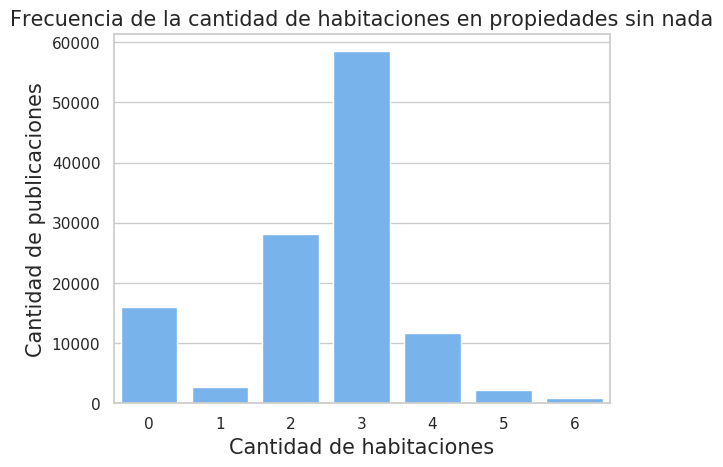

In [129]:
g = sns.countplot(x='habitaciones', data=PropiedadesSinNada, order=Orden, color= '#66b3ff')
g.set_xlabel("Cantidad de habitaciones", fontsize=15)
g.set_ylabel("Cantidad de publicaciones", fontsize=15)
g.set_title("Frecuencia de la cantidad de habitaciones en propiedades sin nada", fontsize=15)

In [130]:
Combinado = pd.merge(PropiedadesSinNada, PropiedadesConTodo, on= 'id', how='outer')

Text(0, 0.5, '')

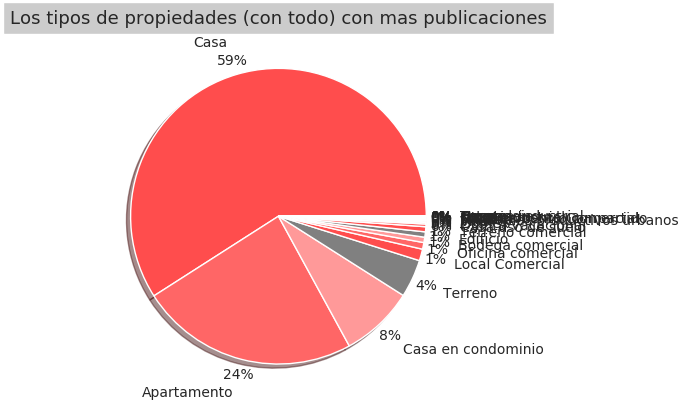

In [131]:
jejox = df['tipodepropiedad'].value_counts()#.nlargest(6)
p = jejox.plot.pie(fontsize=10, autopct='%0.0f%%', pctdistance=1.1, labeldistance=1.23,\
                         shadow=True, startangle=0, colors= red_palette)
plt.title("Los tipos de propiedades (con todo) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

## Agregar el siguiente para ambos

In [132]:
Permiso = df['tipodepropiedad'].value_counts()
Permiso

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [133]:
Otros = Permiso.iloc[5:].sum()
Otros

8599

In [134]:
Permiso['Oficina comercial'] = Otros

In [135]:
lista = Permiso.index.tolist()
indice = lista.index('Oficina comercial')
lista[indice] = 'Resto'
Permiso.index = lista

In [136]:
explo = (0,0.02,0.1,0.15,0.20,0.25)

In [137]:
blue_palette = ['#009ACD', '#0EBFE9','cyan', '#63D1F4', 'gray', '#C1F0F6']

Text(0, 0.5, '')

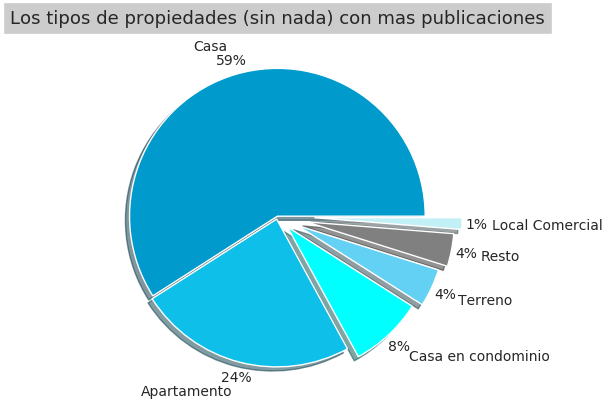

In [138]:
p = Permiso.nlargest(6).plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= blue_palette, explode = explo)
#p.legend(['Casa', 'Apartamento', 'casa','terr','loc','otros'])
plt.title("Los tipos de propiedades (sin nada) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

In [139]:
CiudadMayorDf = PropiedadesConTodo[PropiedadesConTodo['ciudad'] == 'Huixquilucan']
CiudadMayorDf['tipodepropiedad'].value_counts()

Apartamento                      699
Casa                               7
Casa en condominio                 5
Departamento Compartido            1
Terreno industrial                 0
Bodega comercial                   0
Casa uso de suelo                  0
Duplex                             0
Edificio                           0
Garage                             0
Hospedaje                          0
Huerta                             0
Villa                              0
Local Comercial                    0
Local en centro comercial          0
Lote                               0
Nave industrial                    0
Oficina comercial                  0
Otros                              0
Quinta Vacacional                  0
Rancho                             0
Terreno                            0
Terreno comercial                  0
Inmuebles productivos urbanos      0
Name: tipodepropiedad, dtype: int64

In [140]:
CiudadMayorDf['antiguedad'].mean()

4.440340909090909

In [141]:
CiudadMayorDf = PropiedadesConTodo[PropiedadesConTodo['ciudad'] == 'Alvaro Obregón']
CiudadMayorDf['tipodepropiedad'].value_counts()

Apartamento                      308
Casa en condominio                 4
Casa                               1
Terreno industrial                 0
Bodega comercial                   0
Casa uso de suelo                  0
Departamento Compartido            0
Duplex                             0
Edificio                           0
Garage                             0
Hospedaje                          0
Huerta                             0
Villa                              0
Local Comercial                    0
Local en centro comercial          0
Lote                               0
Nave industrial                    0
Oficina comercial                  0
Otros                              0
Quinta Vacacional                  0
Rancho                             0
Terreno                            0
Terreno comercial                  0
Inmuebles productivos urbanos      0
Name: tipodepropiedad, dtype: int64

In [142]:
CiudadMayorDf['antiguedad'].mean()

3.280701754385965

In [143]:
CiudadMayorDf = PropiedadesSinNada[PropiedadesSinNada['ciudad'] == 'San Luis Potosí']
CiudadMayorDf['tipodepropiedad'].value_counts()

Casa                             4093
Apartamento                      1455
Terreno                           297
Terreno comercial                 232
Casa en condominio                186
Local Comercial                    82
Bodega comercial                   64
Oficina comercial                  57
Edificio                            6
Casa uso de suelo                   3
Otros                               2
Departamento Compartido             1
Inmuebles productivos urbanos       1
Terreno industrial                  1
Local en centro comercial           1
Nave industrial                     1
Huerta                              0
Hospedaje                           0
Garage                              0
Duplex                              0
Lote                                0
Quinta Vacacional                   0
Rancho                              0
Villa                               0
Name: tipodepropiedad, dtype: int64

In [144]:
PropiedadesSinNada['habitaciones'].value_counts()

3     58496
2     28081
0     15940
4     11746
1      2675
5      2192
6       840
7       269
8       196
10      127
9        90
Name: habitaciones, dtype: int64

In [145]:
Orden = list(range(7))

Text(0.5, 1.0, 'Frecuencia de la cantidad de habitaciones en propiedades sin nada')

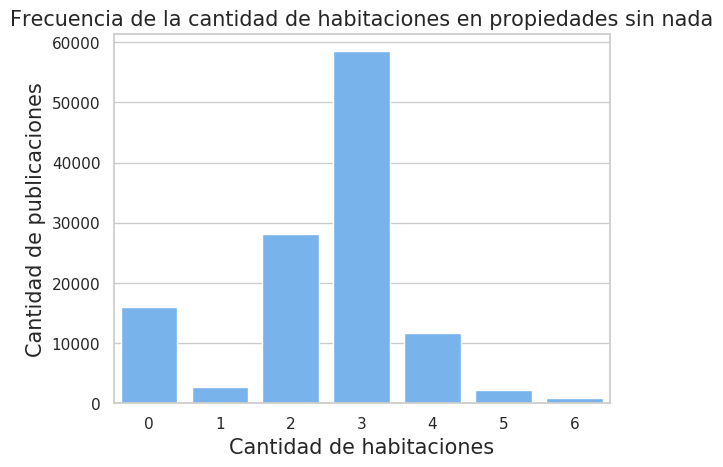

In [146]:
l = sns.countplot(x='habitaciones', data=PropiedadesSinNada, order=Orden, color= '#66b3ff')
l.set_xlabel("Cantidad de habitaciones", fontsize=15)
l.set_ylabel("Cantidad de publicaciones", fontsize=15)
l.set_title("Frecuencia de la cantidad de habitaciones en propiedades sin nada", fontsize=15)

Text(0, 0.5, 'Frecuencia')

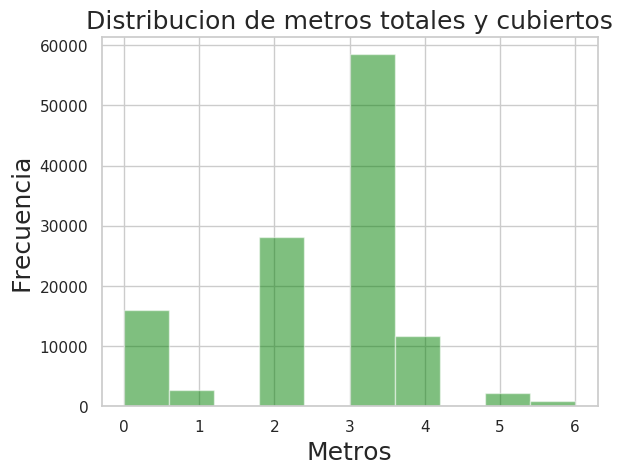

In [147]:
a = PropiedadesSinNada['habitaciones'].plot.hist(bins=10, alpha=0.5, color= ['green','orange'], range=(0, 6))
#a.legend(["Cubiertos", "Totales"]);
a.set_title("Distribucion de metros totales y cubiertos", fontsize=18)
a.set_xlabel("Metros",fontsize=18)
a.set_ylabel("Frecuencia", fontsize=18)

In [148]:
sTop15 = PropiedadesConTodo['ciudad'].value_counts().nlargest(15)
sTop15

Huixquilucan              712
Alvaro Obregón            313
Zapopan                   266
Miguel Hidalgo            263
Cuajimalpa de Morelos     212
Cancún                    176
Querétaro                 164
Benito Juárez             136
Tlajomulco de Zúñiga       99
San Andrés Cholula         96
Cuauhtémoc                 95
Acapulco de Juárez         83
San Pedro Garza García     80
Guadalajara                72
Monterrey                  61
Name: ciudad, dtype: int64

In [149]:
hola = sTop15.index.tolist()
hola

['Huixquilucan',
 'Alvaro Obregón',
 'Zapopan',
 'Miguel Hidalgo',
 'Cuajimalpa de Morelos',
 'Cancún',
 'Querétaro',
 'Benito Juárez',
 'Tlajomulco de Zúñiga',
 'San Andrés Cholula',
 'Cuauhtémoc',
 'Acapulco de Juárez',
 'San Pedro Garza García',
 'Guadalajara',
 'Monterrey']

In [150]:
sTop15 = PropiedadesSinNada['ciudad'].value_counts().nlargest(15)
chau = sTop15.index.tolist()

In [151]:
AntiguedadCiudad = df.groupby('ciudad').agg({'antiguedad':'mean'})
final = AntiguedadCiudad.T[hola].T
final2 = AntiguedadCiudad.T[chau].T

In [152]:
final

,antiguedad
ciudad,
Huixquilucan,8.25
Alvaro Obregón,10.39
Zapopan,5.87
Miguel Hidalgo,10.44
Cuajimalpa de Morelos,7.44
Cancún,4.90
Querétaro,3.77
Benito Juárez,10.57
Tlajomulco de Zúñiga,3.01


In [153]:
final2

,antiguedad
ciudad,
San Luis Potosí,3.96
Querétaro,3.77
Benito Juárez,10.57
Zapopan,5.87
Monterrey,7.27
Mérida,3.06
Cuauhtémoc,13.90
Alvaro Obregón,10.39
Miguel Hidalgo,10.44


In [154]:
grupo = df.groupby('ciudad')
actual = grupo['tipodepropiedad'].value_counts()
final = actual.unstack()[['Apartamento', 'Casa']].T[chau].T
final

tipodepropiedad,Apartamento,Casa
ciudad,,
San Luis Potosí,"1,663.00","5,192.00"
Querétaro,877.00,"8,527.00"
Benito Juárez,"8,714.00","1,250.00"
Zapopan,"1,197.00","7,000.00"
Monterrey,958.00,"5,066.00"
Mérida,479.00,"5,960.00"
Cuauhtémoc,"4,981.00",735.00
Alvaro Obregón,"3,486.00","1,866.00"
Miguel Hidalgo,"4,767.00",534.00


Text(0, 0.5, 'counts')

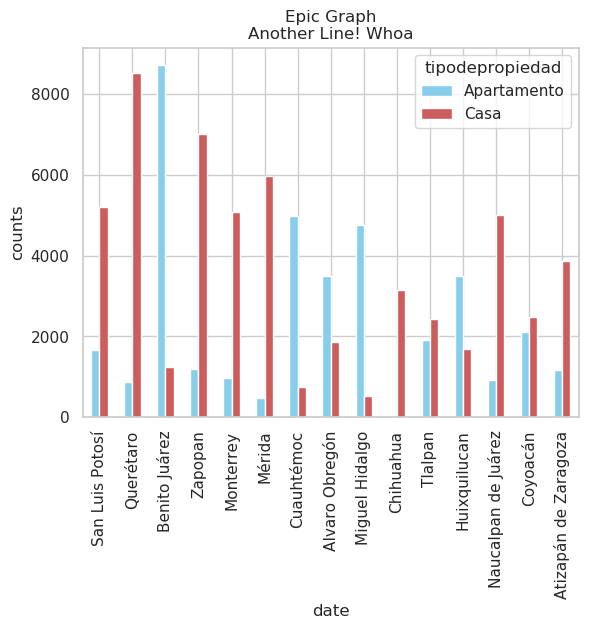

In [155]:
ax = final.plot.bar(color=["SkyBlue","IndianRed", 'green'], rot=90, title="Epic Graph\nAnother Line! Whoa")
ax.set_xlabel("date")
ax.set_ylabel("counts")

In [156]:
top8 = PropiedadesConTodo['ciudad'].value_counts().nlargest(8)
top8

Huixquilucan             712
Alvaro Obregón           313
Zapopan                  266
Miguel Hidalgo           263
Cuajimalpa de Morelos    212
Cancún                   176
Querétaro                164
Benito Juárez            136
Name: ciudad, dtype: int64

In [157]:
#diferentes = ['Zapopan', 'Cancún', 'Querétaro', 'Tlajomulco de Zúñiga','San Andrés Cholula','Guadalajara', 'Monterrey']
#dudosos = ['San Pedro Garza García']
diferentes = ['Zapopan', 'Cancún', 'Querétaro']
iguales = list(set(top8.index.to_list()) - set(diferentes)) #- set(dudosos))

In [158]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
actual.to_frame().T[diferentes].T

,antiguedad
ciudad,
Zapopan,5.87
Cancún,4.90
Querétaro,3.77


In [159]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
actual.to_frame().T[iguales].T

,antiguedad
ciudad,
Alvaro Obregón,10.39
Cuajimalpa de Morelos,7.44
Benito Juárez,10.57
Miguel Hidalgo,10.44
Huixquilucan,8.25


## En conlusion las ciudades tenderan a tener mas apartamentos que casas y en el caso contrario la antiguedad de las propiedades tenderan a ser bajas. Para ambas el primedio de habitaciones por propiedad sera entre 2.5 y 3

In [160]:
grupo = df.groupby('ciudad')
actual = grupo['habitaciones'].mean()
actual.to_frame().T[diferentes].T

,habitaciones
ciudad,
Zapopan,2.67
Cancún,2.62
Querétaro,2.64


In [161]:
grupo = df.groupby('ciudad')
actual = grupo['habitaciones'].mean()
actual.to_frame().T[iguales].T

,habitaciones
ciudad,
Alvaro Obregón,2.60
Cuajimalpa de Morelos,2.53
Benito Juárez,2.36
Miguel Hidalgo,2.28
Huixquilucan,2.86


In [162]:
sTop15 = PropiedadesSinNada['ciudad'].value_counts().nlargest(15)

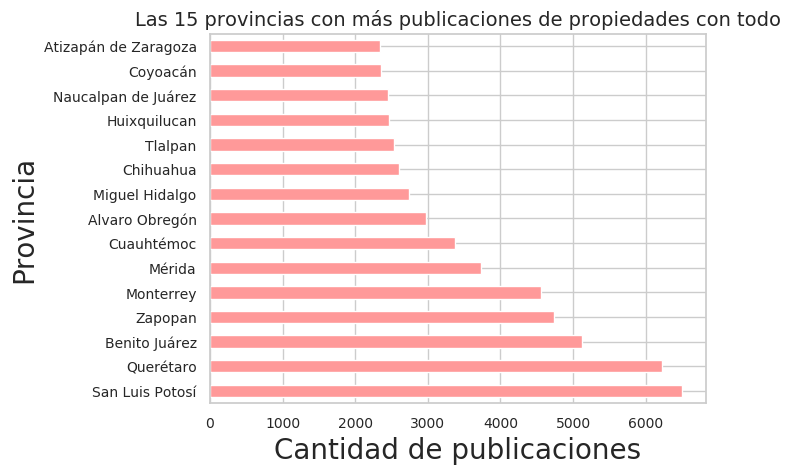

In [163]:
k = sTop15.plot(kind='barh', fontsize=10, color= '#ff9999')#color= plt.cm.Paired(np.arange(len(sTop15))))
k.set_title('Las 15 provincias con más publicaciones de propiedades con todo', fontsize=14);
k.set_xlabel('Cantidad de publicaciones', fontsize=20);
k.set_ylabel('Provincia', fontsize=20);

In [164]:
lista = sTop15.nlargest(15).index.tolist()
lista

['San Luis Potosí',
 'Querétaro',
 'Benito Juárez',
 'Zapopan',
 'Monterrey',
 'Mérida',
 'Cuauhtémoc',
 'Alvaro Obregón',
 'Miguel Hidalgo',
 'Chihuahua',
 'Tlalpan',
 'Huixquilucan',
 'Naucalpan de Juárez',
 'Coyoacán',
 'Atizapán de Zaragoza']

In [165]:
grupo = df.groupby('ciudad')
actual = grupo['tipodepropiedad'].value_counts()
final = actual.unstack()[['Apartamento', 'Casa']].T[lista].T
final

tipodepropiedad,Apartamento,Casa
ciudad,,
San Luis Potosí,"1,663.00","5,192.00"
Querétaro,877.00,"8,527.00"
Benito Juárez,"8,714.00","1,250.00"
Zapopan,"1,197.00","7,000.00"
Monterrey,958.00,"5,066.00"
Mérida,479.00,"5,960.00"
Cuauhtémoc,"4,981.00",735.00
Alvaro Obregón,"3,486.00","1,866.00"
Miguel Hidalgo,"4,767.00",534.00


In [166]:
diferentes = final.index[(final['Apartamento']>final['Casa'])].tolist()
iguales = final.index[(final['Apartamento']<final['Casa'])].tolist()

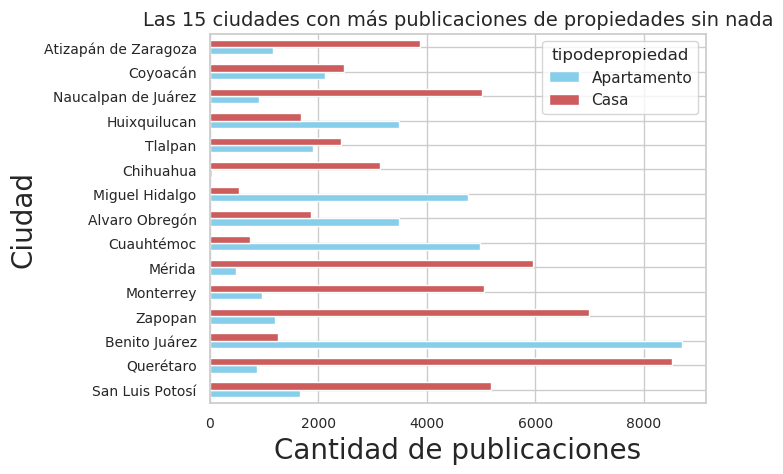

In [167]:
b = final.plot(kind='barh', fontsize=10, color=["SkyBlue","IndianRed", "green"],width=0.6)
b.set_title('Las 15 ciudades con más publicaciones de propiedades sin nada', fontsize=14);
b.set_xlabel('Cantidad de publicaciones', fontsize=20);
b.set_ylabel('Ciudad', fontsize=20);

Text(0, 0.5, 'counts')

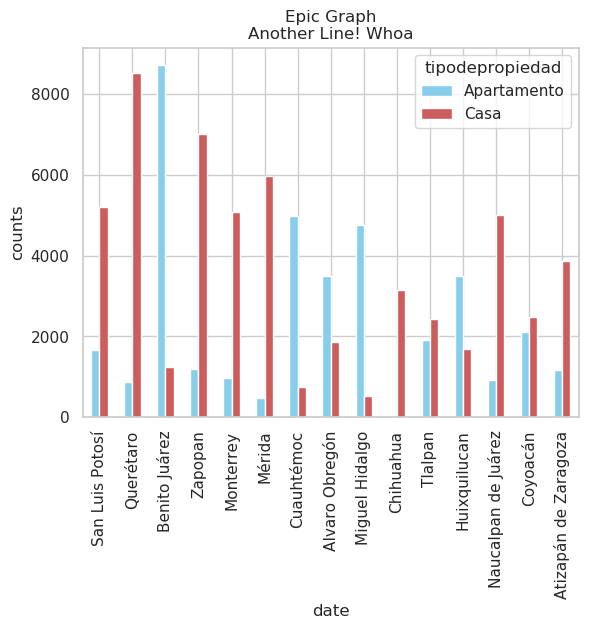

In [168]:
ax = final.plot.bar(color=["SkyBlue","IndianRed", 'green'], rot=90, title="Epic Graph\nAnother Line! Whoa")
ax.set_xlabel("date")
ax.set_ylabel("counts")

In [169]:
top8 = PropiedadesSinNada['ciudad'].value_counts().nlargest(15)
top8

San Luis Potosí         6502
Querétaro               6221
Benito Juárez           5120
Zapopan                 4740
Monterrey               4562
Mérida                  3730
Cuauhtémoc              3373
Alvaro Obregón          2980
Miguel Hidalgo          2747
Chihuahua               2600
Tlalpan                 2536
Huixquilucan            2461
Naucalpan de Juárez     2450
Coyoacán                2361
Atizapán de Zaragoza    2342
Name: ciudad, dtype: int64

In [170]:
#diferentes = ['Zapopan', 'Cancún', 'Querétaro', 'Tlajomulco de Zúñiga','San Andrés Cholula','Guadalajara', 'Monterrey']
#dudosos = ['San Pedro Garza García']
#diferentes = ['Distrito Federal']
#iguales = list(set(top8.index.to_list()) - set(diferentes)) #- set(dudosos))

In [171]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
actual.to_frame().T[diferentes].T.sort_values('antiguedad')

,antiguedad
ciudad,
Huixquilucan,8.25
Alvaro Obregón,10.39
Miguel Hidalgo,10.44
Benito Juárez,10.57
Cuauhtémoc,13.90


In [172]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
actual.to_frame().T[iguales].T.sort_values('antiguedad')

,antiguedad
ciudad,
Mérida,3.06
Querétaro,3.77
San Luis Potosí,3.96
Zapopan,5.87
Chihuahua,6.16
Monterrey,7.27
Atizapán de Zaragoza,10.11
Tlalpan,11.65
Naucalpan de Juárez,13.36


In [173]:
cuauX = df[df['ciudad'] == 'Cuauhtémoc']
cuau = cuauX['tipodepropiedad'].value_counts().nlargest(6)

In [174]:
merida = df[df['ciudad'] == 'Miguel Hidalgo']
miguel = merida['tipodepropiedad'].value_counts().nlargest(6)

In [175]:
Alvaro = df[df['ciudad'] == 'Alvaro Obregón']
Alv = Alvaro['tipodepropiedad'].value_counts().nlargest(6)

Text(0, 0.5, '')

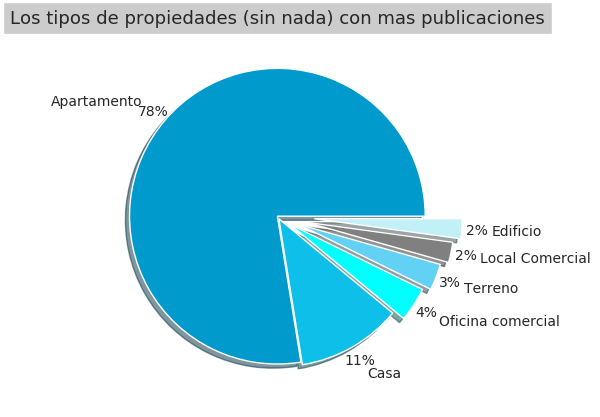

In [176]:
p = cuau.plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= blue_palette, explode= explo)
plt.title("Los tipos de propiedades (sin nada) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

Text(0, 0.5, '')

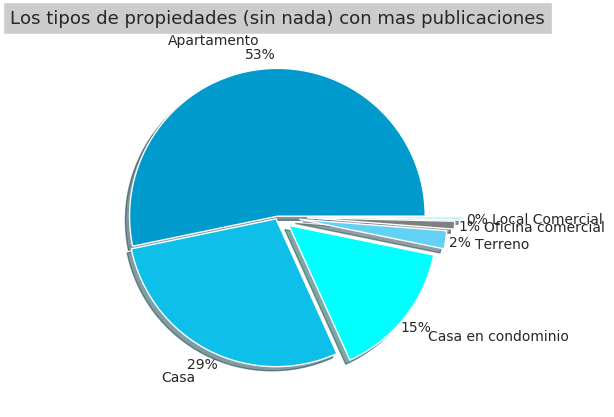

In [177]:
p = Alv.plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= blue_palette, explode= explo)
plt.title("Los tipos de propiedades (sin nada) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

Text(0, 0.5, '')

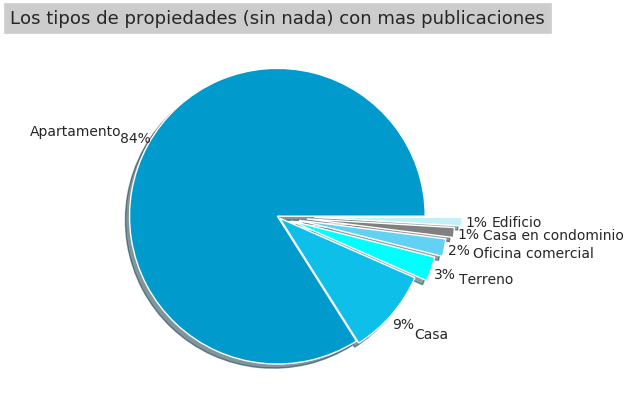

In [178]:
p = miguel.plot.pie(fontsize=10, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,\
                         shadow=True, startangle=0, colors= blue_palette, explode= explo)
plt.title("Los tipos de propiedades (sin nada) con mas publicaciones", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
p.set_ylabel('')

In [179]:
PropiedadesSinNada['antiguedad'].mean()

8.396817139208778

In [180]:
PropiedadesConTodo['antiguedad'].mean()

3.1921424186617555

In [181]:
merida['habitaciones'].mean()

2.2814495254529765

In [182]:
cuauX['habitaciones'].mean()

2.10432416087088

### Precio: cuau: 33M < miguel: 44M
### Habita: cuau: 2.1 < miguel: 2.28
### Aparta: cuau: 78% < miguel: 84%

In [183]:
Alvaro['habitaciones'].mean()

2.5986733001658373

In [184]:
Alvaro['precio'].mean()

4469725.506105835

### Precio: cuau: 33M < Alvaro: 44M
### Habita: cuau: 2.1 > miguel: 2.59
### Aparta: cuau: 78% > miguel: 53%

In [185]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
difDf = actual.to_frame().T[diferentes].T.sort_values('antiguedad', ascending= False)

In [186]:
grupo = df.groupby('ciudad')
actual = grupo['antiguedad'].mean()
iguDf = actual.to_frame().T[iguales].T.sort_values('antiguedad', ascending= False)

In [187]:
final = iguDf.append(difDf)

In [188]:
rojos = ['IndianRed' for i in range(len(diferentes))]
azules = ['SkyBlue' for i in range(len(iguales))]
colores = rojos + azules
colores

['IndianRed',
 'IndianRed',
 'IndianRed',
 'IndianRed',
 'IndianRed',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue',
 'SkyBlue']

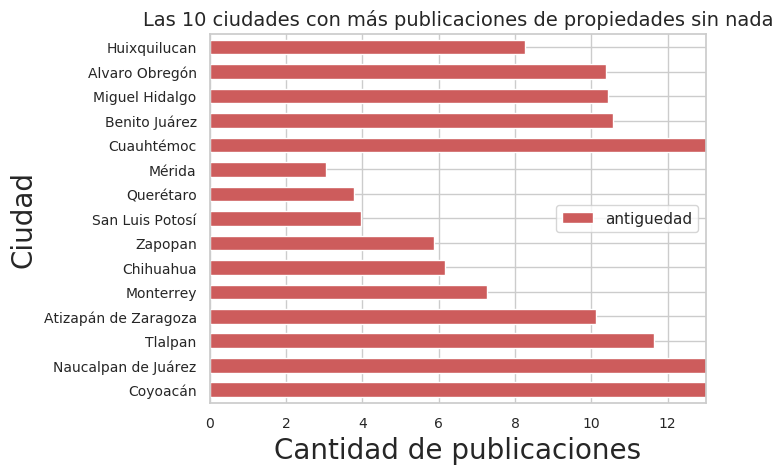

In [189]:
aa = final.plot(kind='barh', fontsize=10, color=colores,width=0.6, xlim=(0.0, 13.0))
aa.color = colores
aa.set_title('Las 10 ciudades con más publicaciones de propiedades sin nada', fontsize=14);
aa.set_xlabel('Cantidad de publicaciones', fontsize=20);
aa.set_ylabel('Ciudad', fontsize=20);

In [190]:
df[df['tipodepropiedad']=='Casa']['antiguedad'].mean()

8.272587501890344

In [191]:
df[df['tipodepropiedad']=='Apartamento']['antiguedad'].mean()

8.362021122385586

In [192]:
CantTodo = PropiedadesConTodo['ciudad'].value_counts()
CantTotal = df['ciudad'].value_counts()
CantTodo

Huixquilucan                    712
Alvaro Obregón                  313
Zapopan                         266
Miguel Hidalgo                  263
Cuajimalpa de Morelos           212
                               ... 
San Cristóbal de las Casas        0
San Cristóbal de la Barranca      0
San Blas                          0
San Bartolo Coyotepec             0
Abalá                             0
Name: ciudad, Length: 875, dtype: int64

In [193]:
CantTodo.sort_index(inplace=True)

In [194]:
CantTotal.sort_index(inplace=True)

In [195]:
datos = (CantTodo.values * 100)/(CantTotal.values)
indice = CantTodo.index

In [196]:
Final = pd.Series(datos, index=indice)
lista = Final.nlargest(15).index.tolist()

In [197]:
grupo = df.groupby('ciudad')
actual = grupo['tipodepropiedad'].value_counts()
#final = actual.unstack()[['Apartamento', 'Casa']].T[lista].T
#final

In [198]:
actual.unstack(0)[lista].T

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
ciudad,,,,,,,,,,,,,,,,,,,,,
otra,13.00,nan,6.00,2.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan
Mexquitic de Carmona,4.00,nan,1.00,1.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan
Huixquilucan,"3,490.00",nan,"1,675.00",390.00,1.00,9.00,nan,4.00,nan,nan,...,nan,nan,13.00,3.00,1.00,1.00,106.00,4.00,nan,1.00
Temozón,4.00,nan,14.00,2.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan
Aldama,nan,nan,10.00,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,1.00,1.00,nan,nan,nan
Yecapixtla,1.00,nan,7.00,4.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Huejotzingo,2.00,nan,8.00,1.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,2.00,nan,nan,1.00
Cuajimalpa de Morelos,"1,828.00",1.00,520.00,574.00,3.00,5.00,nan,1.00,nan,nan,...,nan,nan,28.00,nan,nan,nan,49.00,4.00,nan,nan
San Pedro Garza García,679.00,1.00,647.00,9.00,2.00,1.00,1.00,1.00,nan,nan,...,nan,nan,31.00,9.00,nan,nan,32.00,6.00,nan,nan


Text(0, 0.5, 'counts')

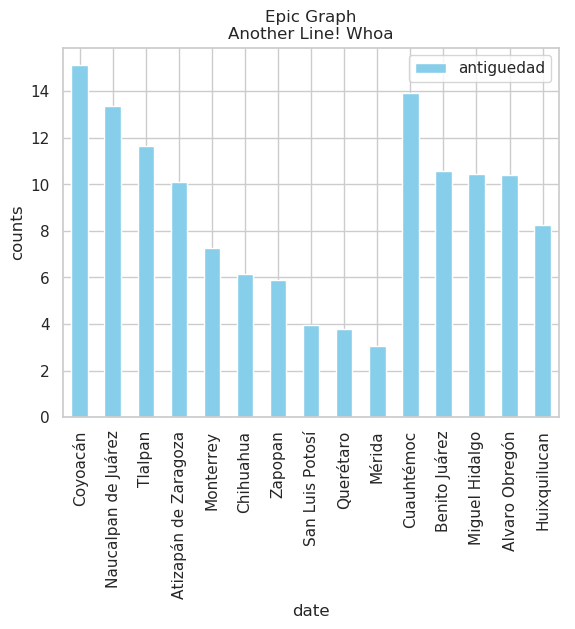

In [199]:
ax = final.plot.bar(color=["SkyBlue","IndianRed"], rot=90, title="Epic Graph\nAnother Line! Whoa")
ax.set_xlabel("date")
ax.set_ylabel("counts")